# DAMASK WORKFLOWS
This jupyter notebook describes a typical DAMASK workflow. There can be variations of this workflow, but this is the simplest possible test case.

The DAMASK version used here is - development version (version number: 3.0.0 )

Currently, run this jupyter notebook on maws03 workstation



## Pre-processing 
### Geometry generation
Create a geometry file for DAMASK and also (possibly?) visualise it


### Load definition

Load definition in this example in form of .load files. 
Migrating to having YAML based load definition.

## Run Simulation

In [1]:
import subprocess, shlex
import os

In [2]:
os.chdir('Examples/')

In [3]:
subprocess.run(shlex.split('DAMASK_grid -l tensionX.load -g 20grains16x16x16.geom'))

CompletedProcess(args=['DAMASK_grid', '-l', 'tensionX.load', '-g', '20grains16x16x16.geom'], returncode=0)

In [4]:
!ls

20grains16x16x16.geom		  20grains16x16x16_tensionX.hdf5  material.yaml
20grains16x16x16_tensionX_0.hdf5  20grains16x16x16_tensionX.sta   numerics.yaml
20grains16x16x16_tensionX.C_ref   20grains.seeds		  tensionX.load


## Post-process data

Example will generate stress, strain distributions and a stress strain curve

In [5]:
import damask

Calculations to add von Mises stress and strain values

In [6]:
d = damask.Result('20grains16x16x16_tensionX.hdf5')
d.add_Cauchy()
d.add_strain_tensor()
d.add_Mises('sigma')
d.add_Mises('epsilon_V^0.0(F)')
d.add_calculation('avg_sigma',"np.average(#sigma_vM#)")
d.add_calculation('avg_epsilon',"np.average(#epsilon_V^0.0(F)_vM#)")

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


## Plotting and vtr files

In [12]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as PyPlot
import numpy as np
import h5py

In [14]:
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


Text(0, 0.5, '$\\sigma_{VM}$ (MPa)')

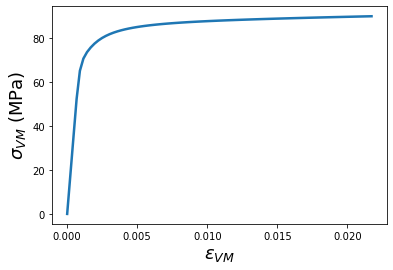

In [16]:
stress_path = d.get_dataset_location('avg_sigma')
stress = np.zeros(len(stress_path))
strain = np.zeros(len(stress_path))
hdf = h5py.File(d.fname)
for count,path in enumerate(stress_path):
    stress[count] = np.array(hdf[path])
    strain[count] = np.array(hdf[path.split('avg_sigma')[0]     + 'avg_epsilon'])

stress = np.array(stress)/1E6
PyPlot.plot(strain,stress,linestyle='-',linewidth='2.5')
PyPlot.xlabel(r'$\varepsilon_{VM} $',fontsize=18)
PyPlot.ylabel(r'$\sigma_{VM}$ (MPa)',fontsize=18)

In [20]:
d.to_vtk(['sigma','epsilon_V^0.0(F)','sigma_vM','epsilon_V^0.0(F)_vM'])

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


Help on method to_vtk in module damask._result:

to_vtk(labels=[], mode='cell') method of damask._result.Result instance
    Export to vtk cell/point data.
    
    Parameters
    ----------
    labels : str or list of, optional
        Labels of the datasets to be exported.
    mode : str, either 'cell' or 'point'
        Export in cell format or point format.
        Defaults to 'cell'.



## View VTK files in the notebook itself

In [ ]:
import pyvista as pv
mesh = pv.read('20grains16x16x16_tensionX_inc20.vtr')  #enter the file name you wish to view

In [ ]:
from itkwidgets import view
import itk

In [ ]:
mesh

In [ ]:
pl = pv.PlotterITK()
pl.add_mesh(mesh)
pl.show()